# Seasonify

Convolutional Neural Network to predict the seasonal color of a person.


## 1. Load data


In [34]:
import glob
import numpy as np

# use colorferet

def load_data():
    autumn_path = "./colorferet_smaller/autumn"
    spring_path = "./colorferet_smaller/spring"
    summer_path = "./colorferet_smaller/summer"
    winter_path = "./colorferet_smaller/winter"

    X, y = [], []

    # autumn = 0
    # spring = 1
    # summer = 2
    # winter = 3
    for i, season_path in enumerate([autumn_path, spring_path, summer_path, winter_path]):
        for fname in glob.glob(season_path + "/" + "*[fr][abc]*"): # regex for front images
            X.append(fname)
            y.append(i)
        
    return np.array(X), np.array(y)

X_all, y_all = load_data()

assert len(X_all) == len(y_all)
print("Number of records in dataset: {:d}".format(len(X)))

Number of records in dataset: 3890


### 1.1 Visualize sample

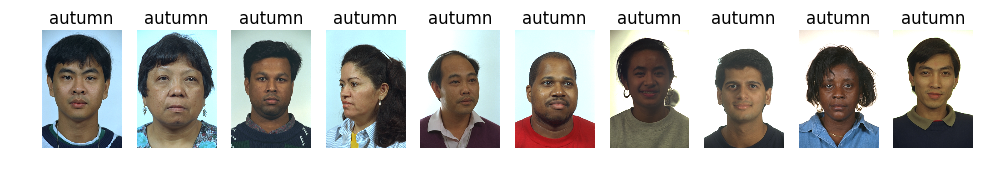

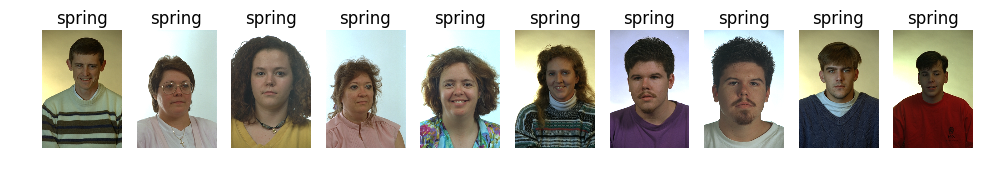

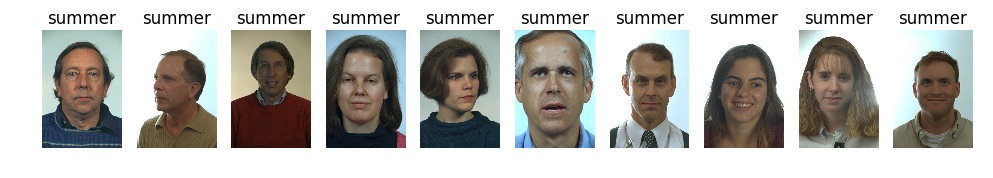

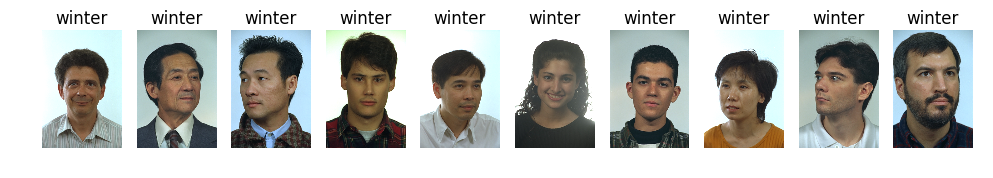

In [40]:
import matplotlib.pyplot as plt
from random import randrange
import cv2
%matplotlib inline

def get_random_images(number, clazz):
    samples = []
    
    while len(samples) < number:
        index = randrange(len(X))
        
        y = y_all[index]
        
        if y == clazz:
            samples.append(X_all[index])
            
    return np.array(samples)
        
def plot_images(images, titles):
    assert len(images) == len(titles)
    n = len(images)
    
    f, ax = plt.subplots(1, n, figsize=(12, 12))
    
    for i, a in enumerate(ax):
        a.axis("off")
        a.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
        a.set_title(titles[i])

def plot_random_images(number):
    
    for i, clazz in enumerate(["autumn", "spring", "summer", "winter"]):
        paths = get_random_images(number, i)
        images = []
        titles = []
        for path in paths:
            images.append(cv2.imread(path))
            titles.append(clazz)
        
        plot_images(images, titles)
    
plot_random_images(10)